# Homework 4

## Question 1

### 1. A naive analysis

We import the data stored in the csv file and we perform a first naive analysis.

We are interested in the *re78* value and how it differs between people who have followed the training program (*treat=1*) and those who did not (*treat=0*).

The first idea is to split the data according to the value of *treat* using the **groupby** method, and use **describe** to print the basic stats about *re78* for each group.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
db = pd.read_csv('lalonde.csv')


db.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [3]:
db.groupby(['treat'])['re78'].describe()

treat       
0      count      429.000000
       mean      6984.169742
       std       7294.161791
       min          0.000000
       25%        220.181300
       50%       4975.505000
       75%      11688.820000
       max      25564.670000
1      count      185.000000
       mean      6349.143530
       std       7867.402218
       min          0.000000
       25%        485.229800
       50%       4232.309000
       75%       9642.999000
       max      60307.930000
Name: re78, dtype: float64

We observe that participating in the program does not seem to improve your income, as the *mean* income is greater among people who did not follow the program.

However the *1st quartile (25%)* is higher among people who followed the program, meaning that there are fewer people with very low salaries.

Moreover, the *max* and *standard deviation* are higher, which means that there are few people who followed the program and earned a lot more than people not following the program, as shown in the following graph:

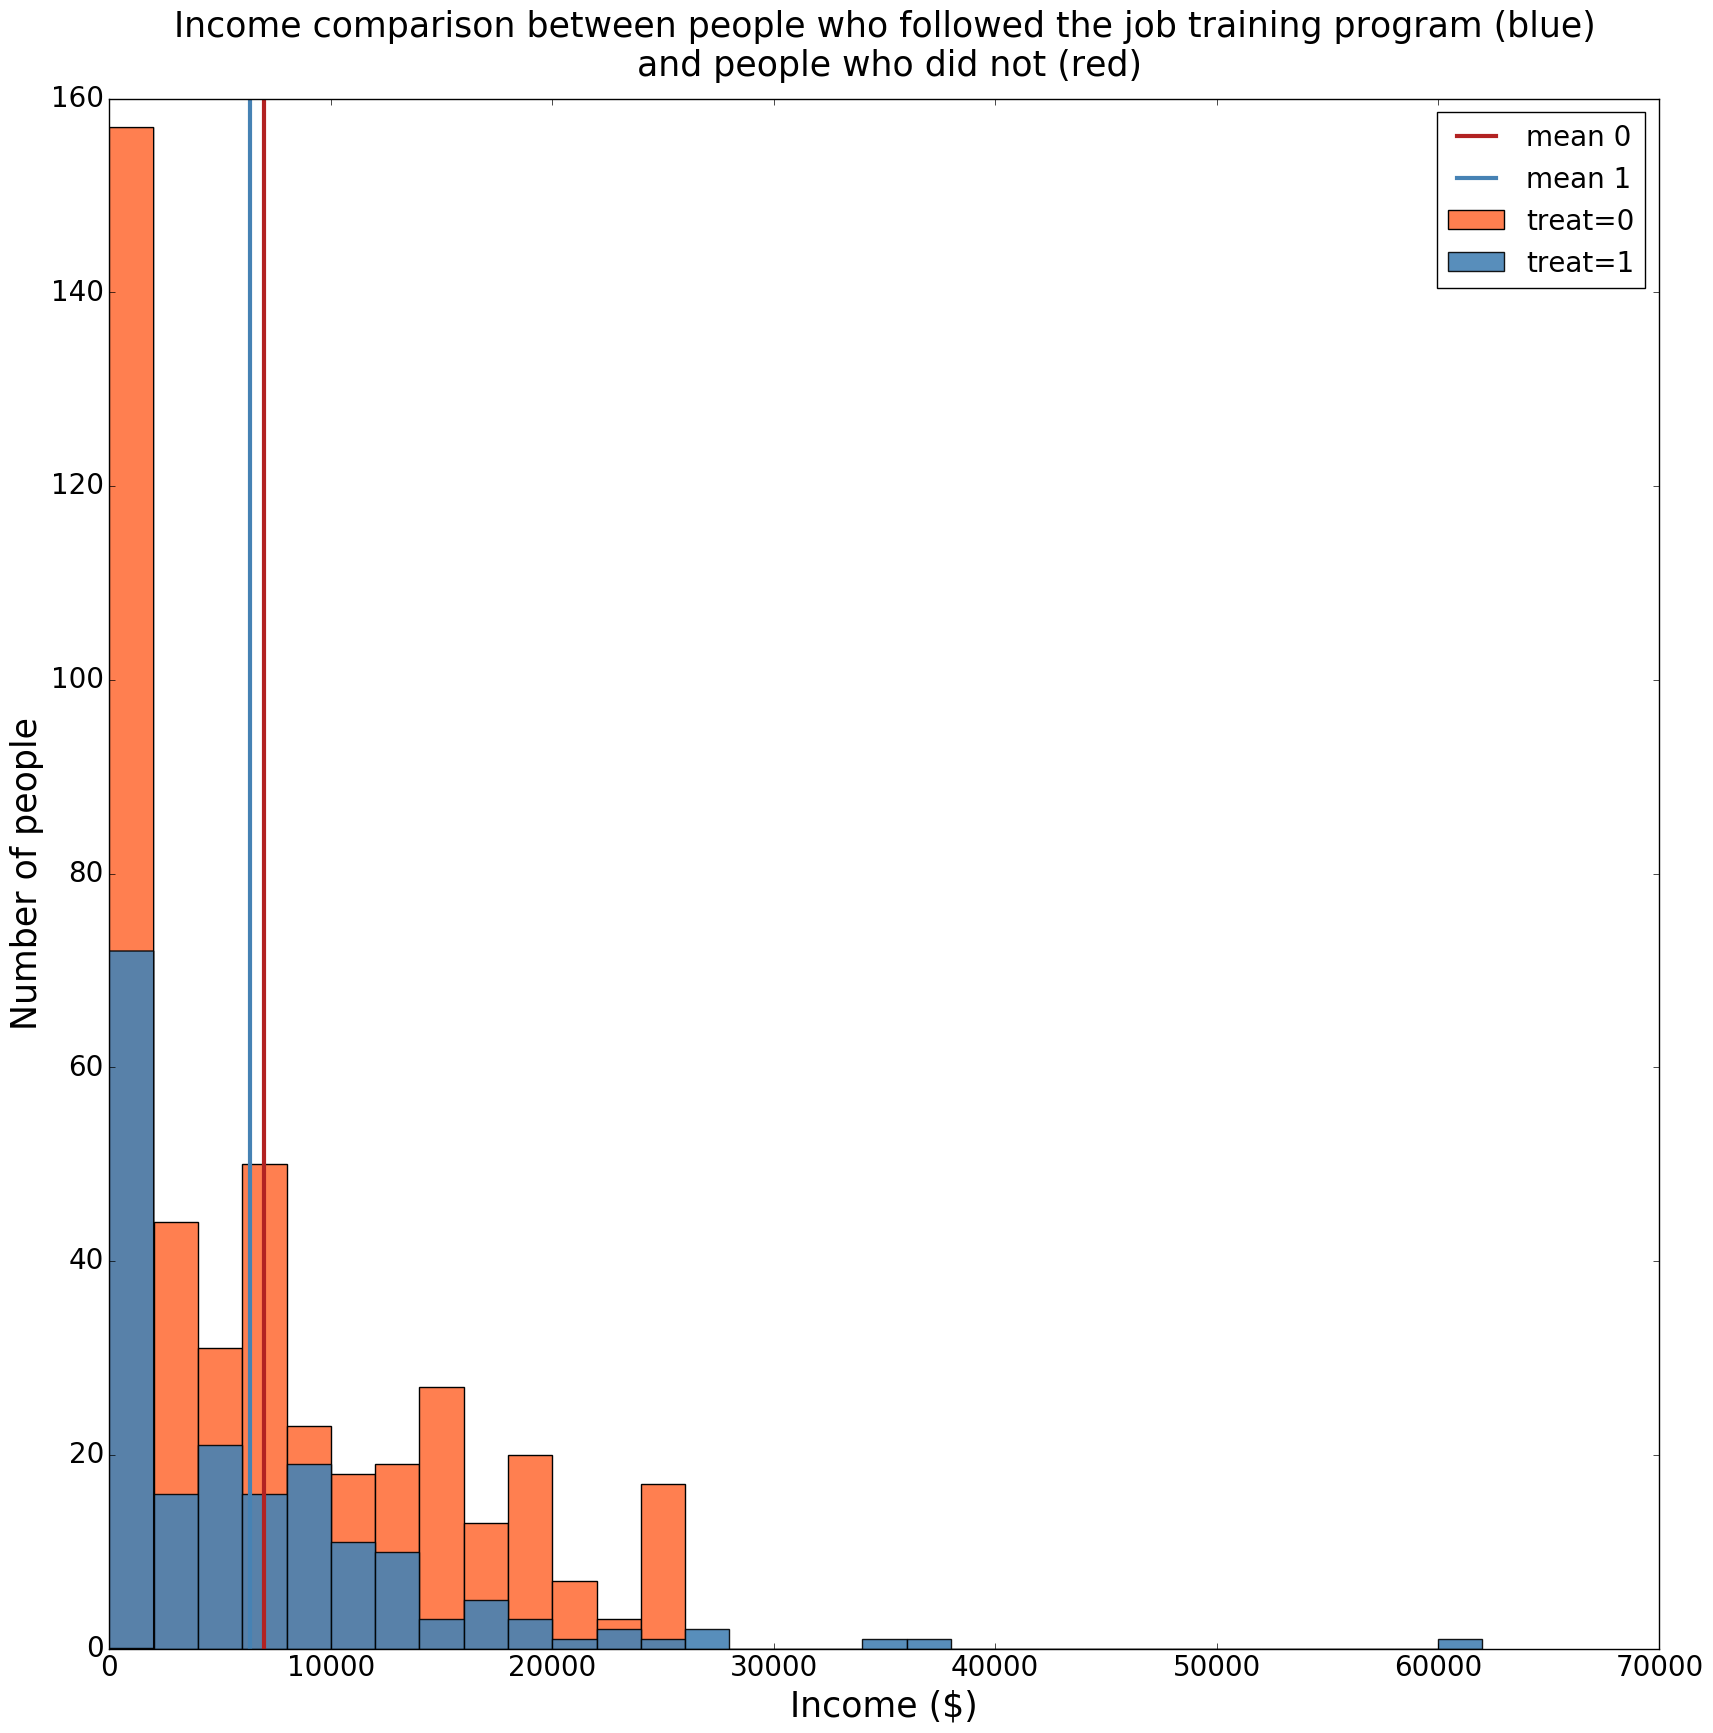

In [59]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([2000*i for i in range(32)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['re78'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['re78'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['re78'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['re78'].mean(),color='steelblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Income comparison between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Income ($)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

A naive researcher might conclude that, depite a few particular cases of great success, the program is **not efficient** to train people.

### 2. A closer look at the data

We are now looking more in detail into the data. We start by comparing the *population distribution* between the trained group and the other group.
To do so we add a new column *other* so that every person is either *black*, *hispanic* or *other*.
To display the results we use a **bar** plot.

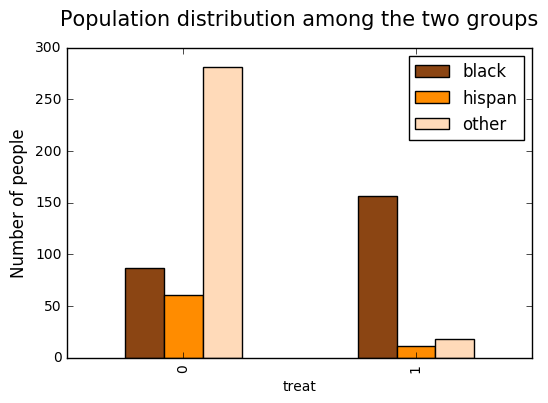

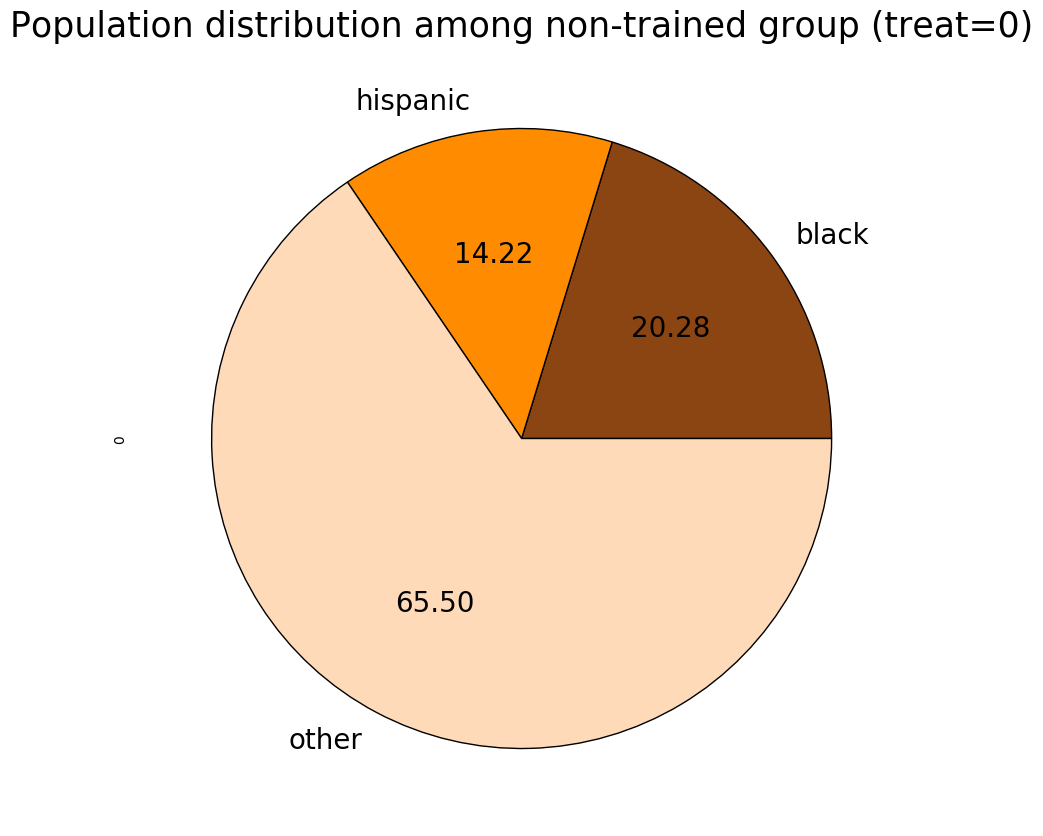

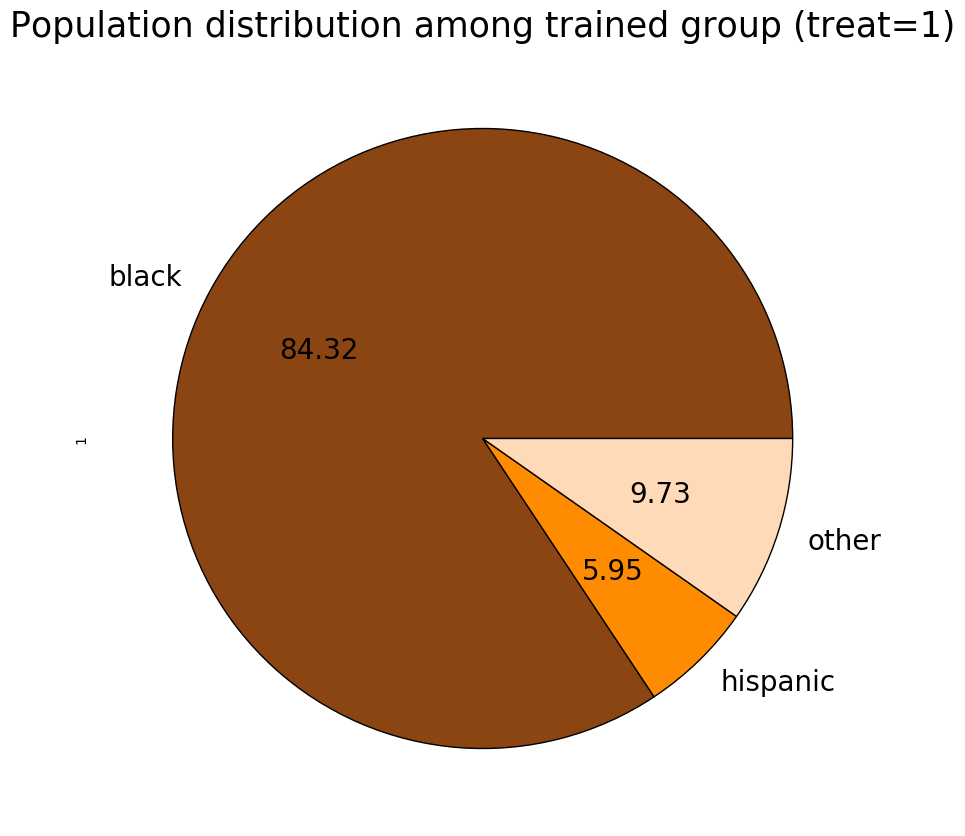

In [88]:
db['other'] = 1-db['black']-db['hispan']
db_pop_distrib = db.groupby(db['treat'])[['black','hispan','other']].sum()

ax = db_pop_distrib.plot.bar(color=['saddlebrown','darkorange','peachpuff'])
plt.title('Population distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

db_pop_distrib.iloc[0].plot.pie(labels=['black','hispanic','other'], colors=['saddlebrown','darkorange','peachpuff'],autopct='%.2f', fontsize=20, figsize=(10, 10))
plt.title('Population distribution among non-trained group (treat=0)',fontsize=25,y=1.01)
plt.show()

db_pop_distrib.iloc[1].plot.pie(labels=['black','hispanic','other'], colors=['saddlebrown','darkorange','peachpuff'],autopct='%.2f', fontsize=20, figsize=(10, 10))
plt.title('Population distribution among trained group (treat=1)',fontsize=25,y=1.01)
plt.show()

It appears that the population subject to the test is inherently **different** from the non-trained sample. Mostly black people took part to the training, which means blindly comparing the data from *treat=1* and *treat=0* does not make any sense.

Let us recall that in 1963, the Civil Rights Movement were marching on Washington to denounce the racial violence and discrimination in the USA. Merely 15 years after the passage of the Civil Rights Act, there must remain **income discrepancies** between black people and white people, due to American History.



We now take a look at the age distribution between the two groups: 

In [91]:
db.groupby(['treat'])['age'].describe()

treat       
0      count    429.000000
       mean      28.030303
       std       10.786653
       min       16.000000
       25%       19.000000
       50%       25.000000
       75%       35.000000
       max       55.000000
1      count    185.000000
       mean      25.816216
       std        7.155019
       min       17.000000
       25%       20.000000
       50%       25.000000
       75%       29.000000
       max       48.000000
Name: age, dtype: float64

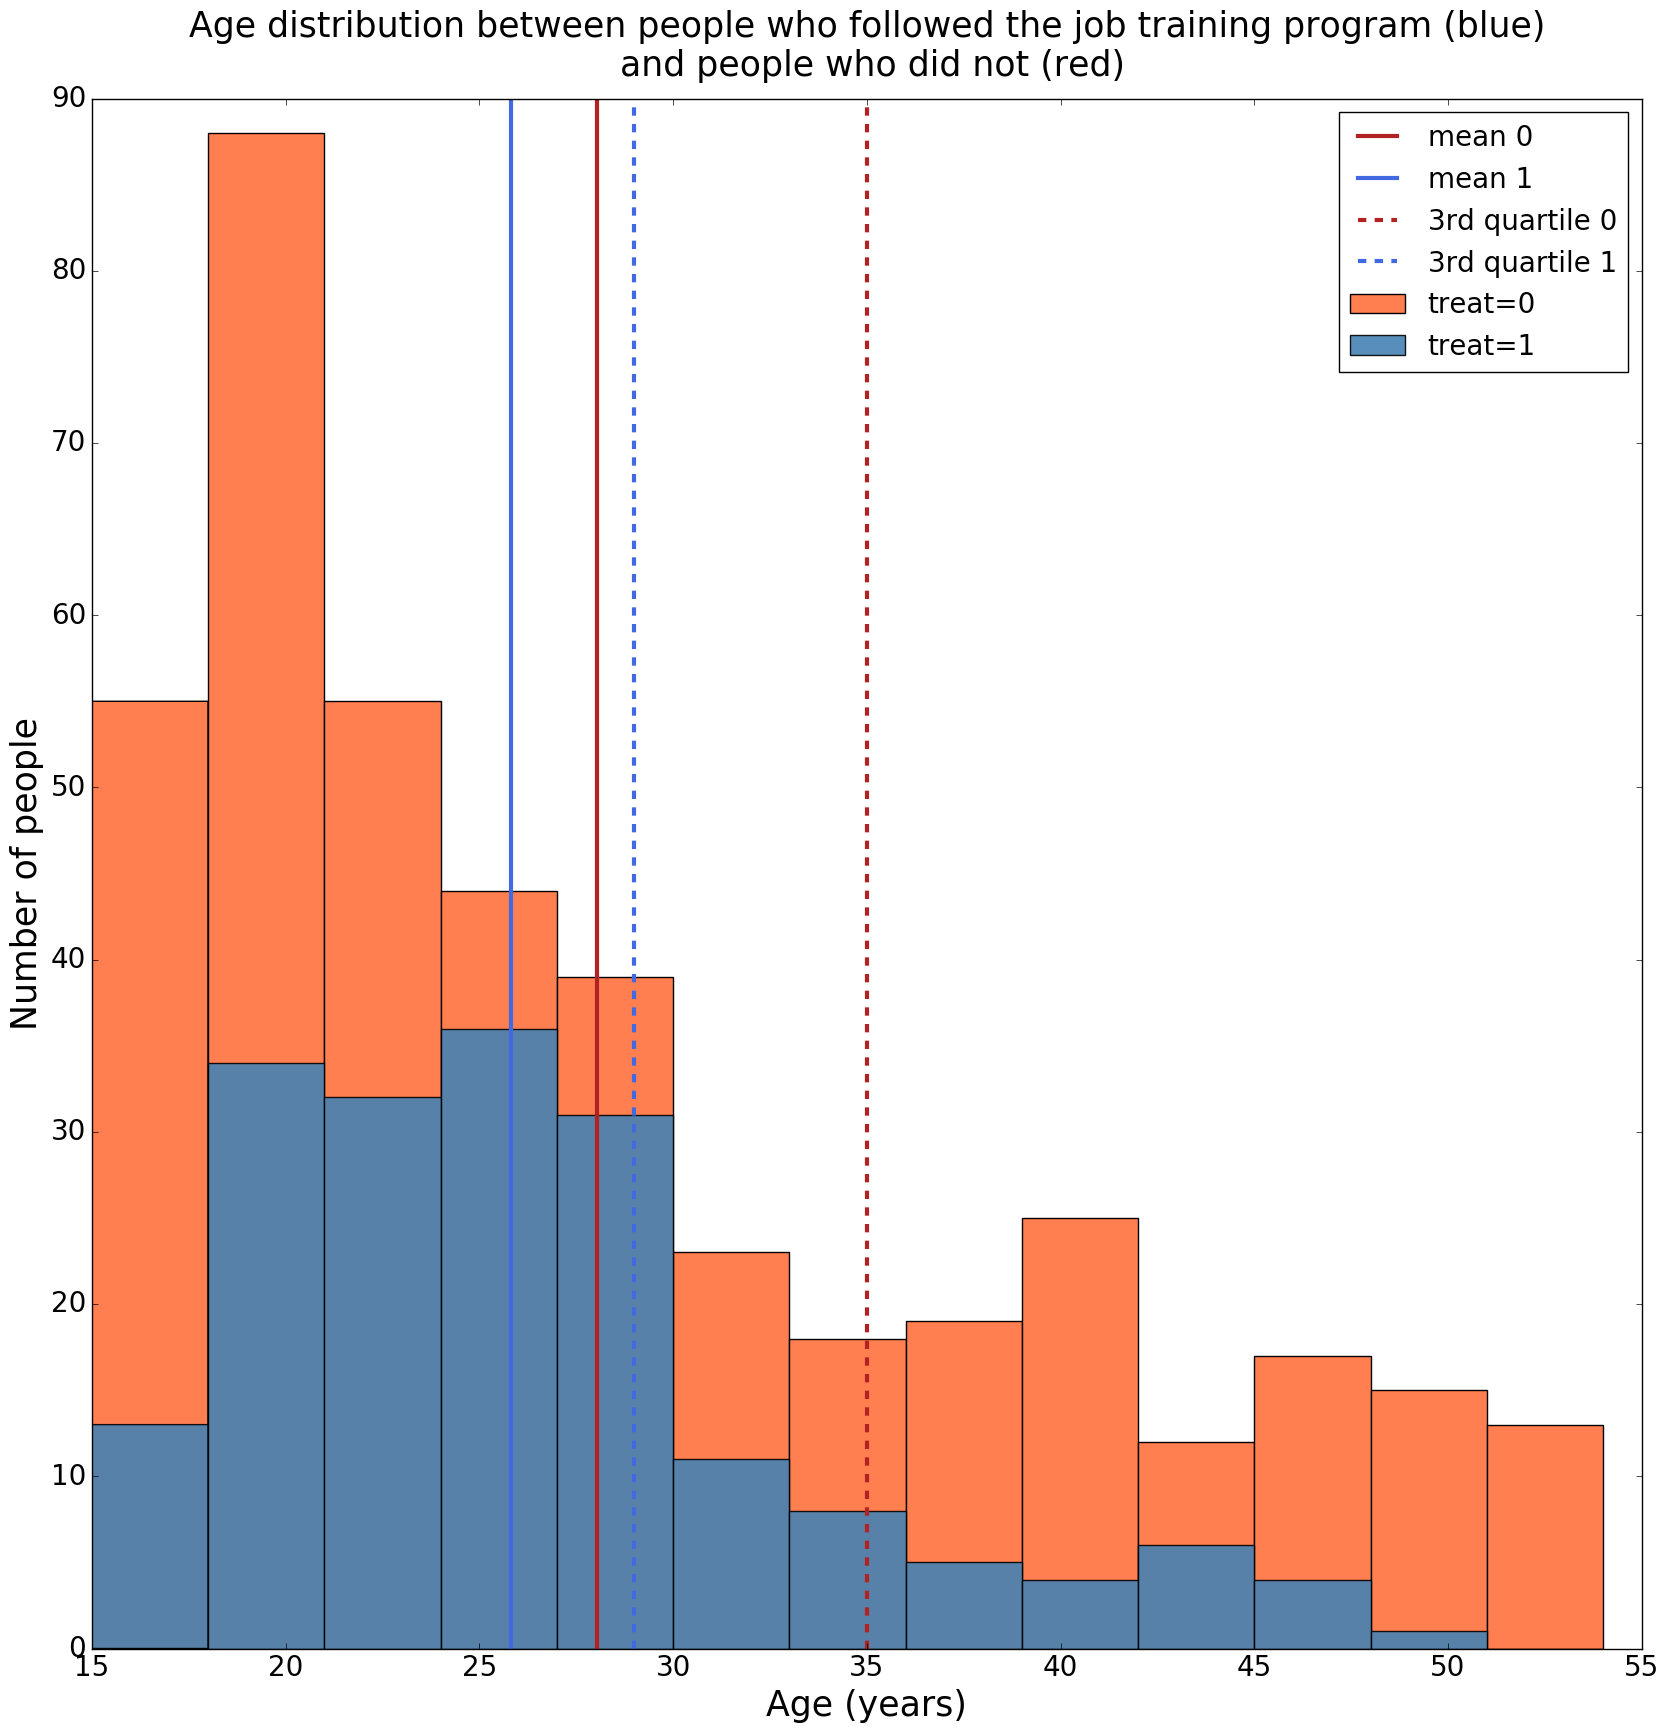

In [89]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([3*i for i in range(5,19)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['age'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['age'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['age'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['age'].mean(),color='royalblue',lw=3,label ='mean 1')

# Add the 3rd quartile
plt.axvline(db[db['treat']==0]['age'].quantile(.75),color='firebrick',lw=3,label ='3rd quartile 0', linestyle='dashed')
plt.axvline(db[db['treat']==1]['age'].quantile(.75),color='royalblue',lw=3,label ='3rd quartile 1', linestyle='dashed')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Age distribution between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Age (years)',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

We observe two differences: 
* people who followed the training are slightly younger on average,
* there are more *older* people in the non-trained population: 25% of the non-trained are above 35 years old while this bound is at 29 years old among the trained group.

It matters because of **career advancement**, ie the fact that people move up to higher positions during their careers, which implies higher incomes. It is **not relevant** to compare the earnings of a 55 year-old and those of a 20 year-old.

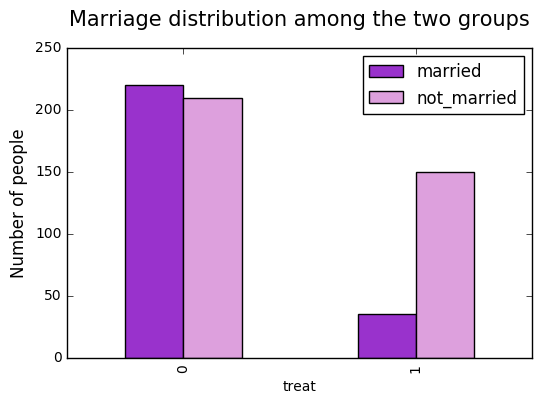

In [100]:
db['not_married'] = 1-db['married']

db_married = db.groupby(db['treat'])[['married','not_married']].sum()

ax = db_married.plot.bar(color=['darkorchid','plum'])
plt.title('Marriage distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

Once again there is a **huge difference** of distribution among the married and non-married people in the trained group, whereas it is around 50/50 in the non-trained group. Even if we are not able to identify how it impacts the results, wa can however be convinced that we cannot compare the two groups as if they were equally distributed.

We now look at the education of the two groups:

In [97]:
db.groupby(['treat'])[['educ','nodegree']].describe()

educ    nodegree
treat                              
0     count  429.000000  429.000000
      mean    10.235431    0.596737
      std      2.855238    0.491126
      min      0.000000    0.000000
      25%      9.000000    0.000000
      50%     11.000000    1.000000
      75%     12.000000    1.000000
      max     18.000000    1.000000
1     count  185.000000  185.000000
      mean    10.345946    0.708108
      std      2.010650    0.455867
      min      4.000000    0.000000
      25%      9.000000    0.000000
      50%     11.000000    1.000000
      75%     12.000000    1.000000
      max     16.000000    1.000000

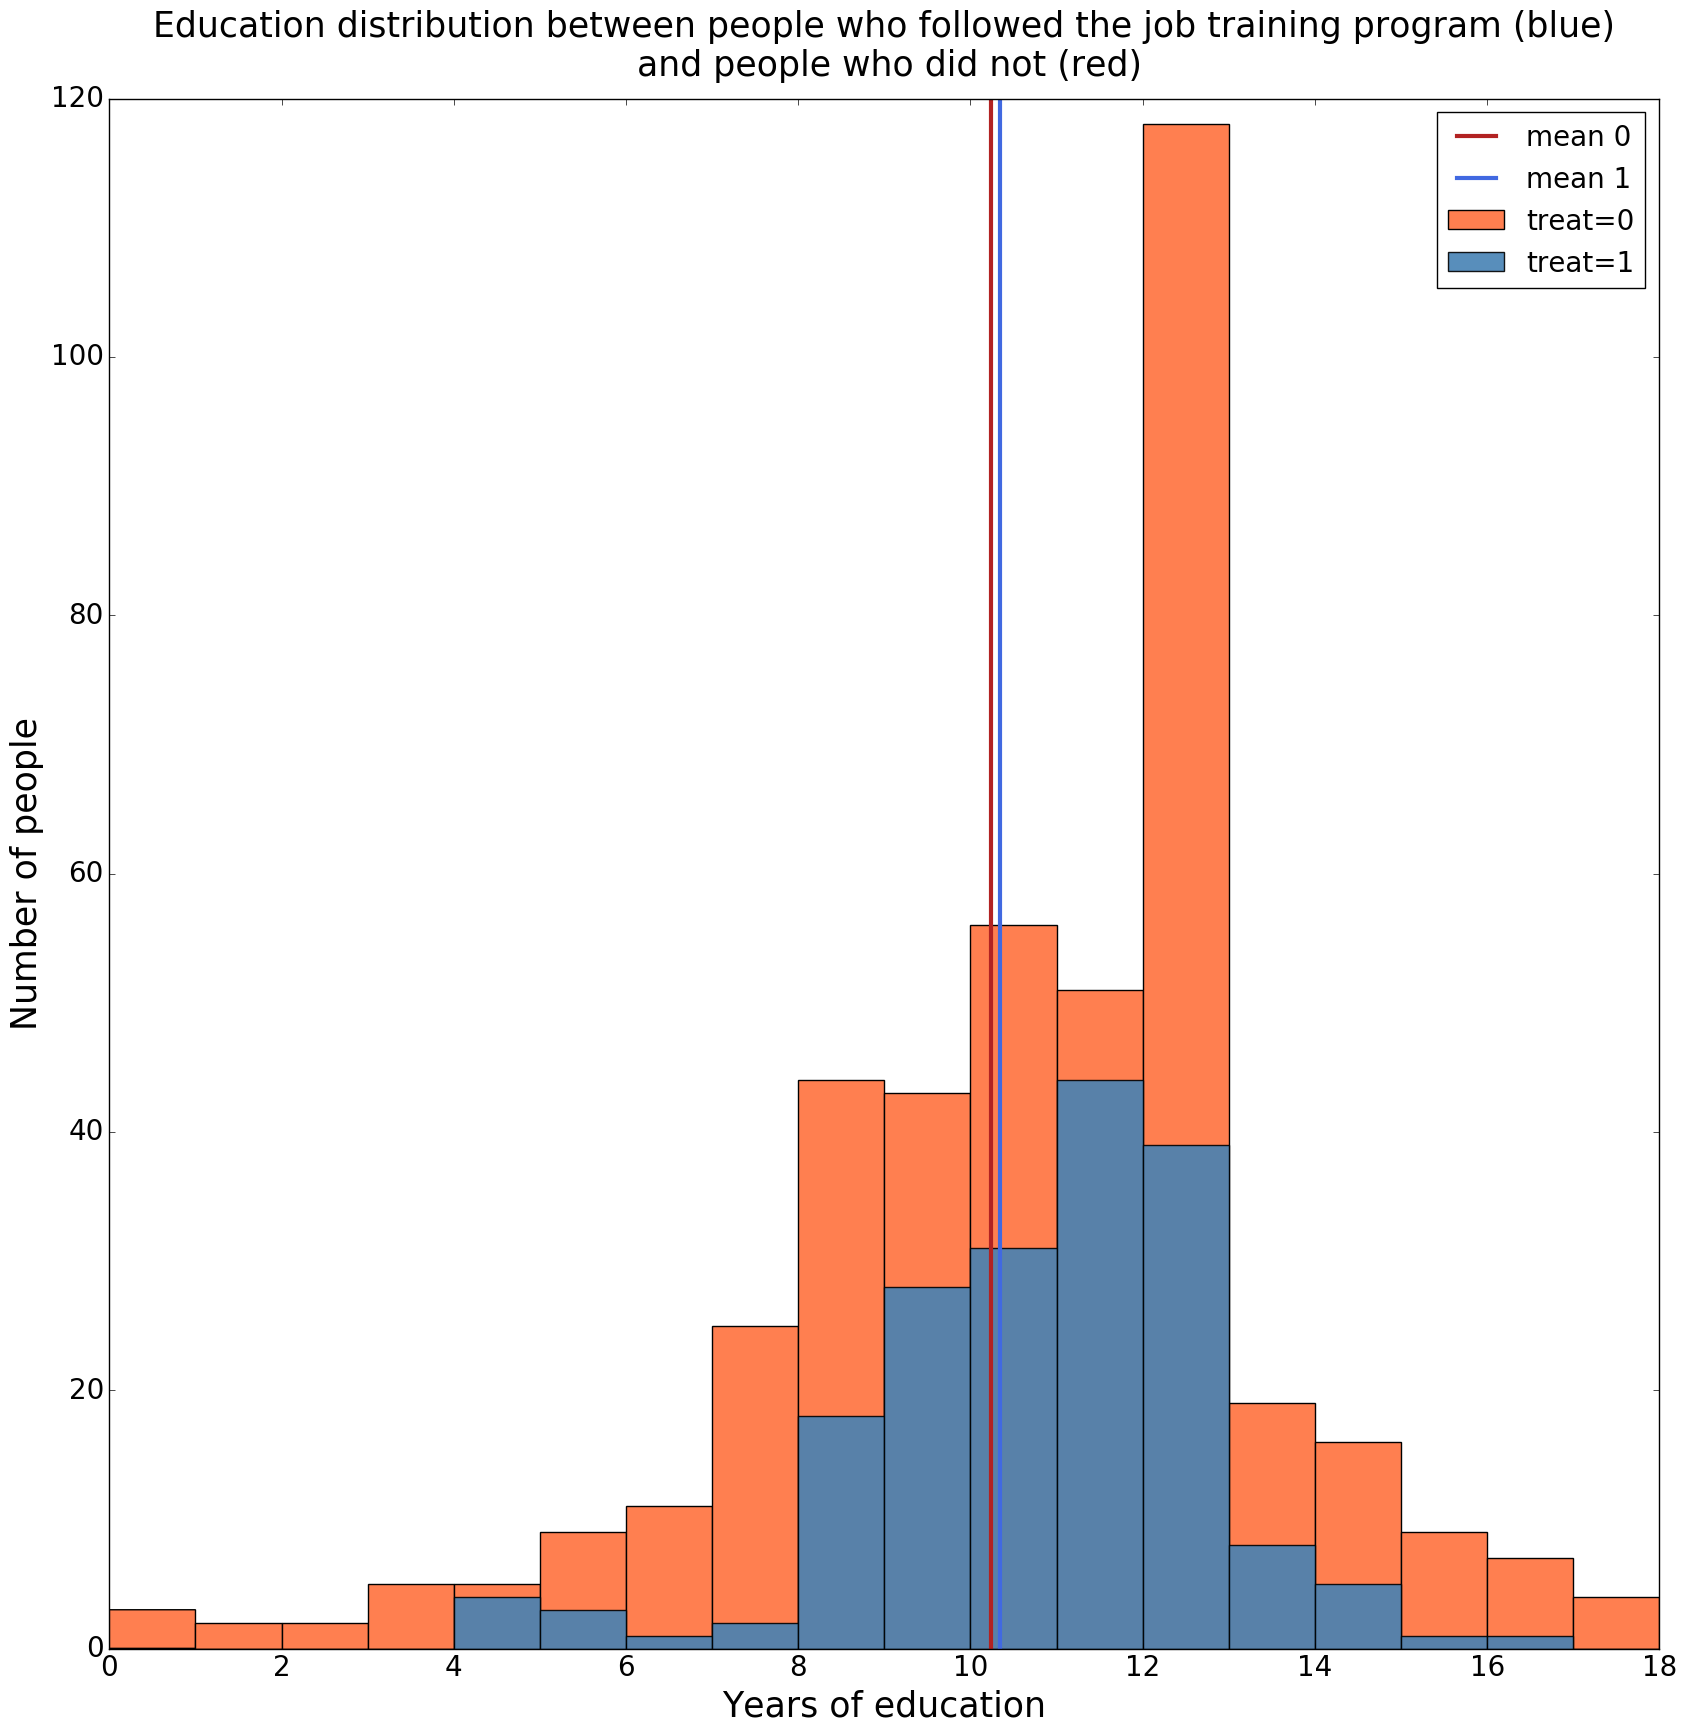

In [99]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([i for i in range(19)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['educ'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['educ'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['educ'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['educ'].mean(),color='royalblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Education distribution between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)
plt.xlabel('Years of education',fontsize=25)
plt.ylabel('Number of people',fontsize=25)
plt.show()

The *education* distribution seems well-balanced between the two groups. The means are very close, the standard deviation is smaller among the trained group (see **describe** above) but the distributions remain consistent between the two groups.

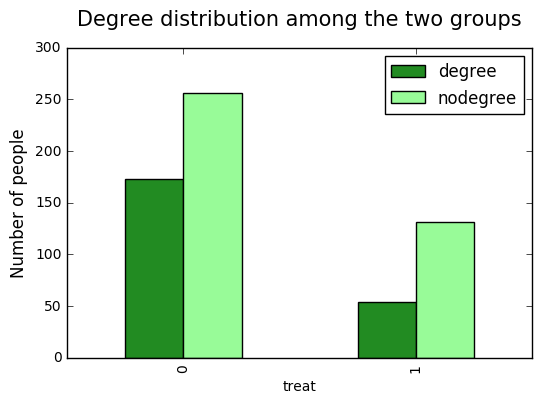

In [101]:
db['degree'] = 1-db['nodegree']

db_degree = db.groupby(db['treat'])[['degree','nodegree']].sum()

ax = db_degree.plot.bar(color=['forestgreen','palegreen'])
plt.title('Degree distribution among the two groups',fontsize=15,y=1.05)
plt.ylabel('Number of people',fontsize=12)
plt.show()

However, the degree distribution is **unbalanced**. Among the trained group, a lot of people do not have a degree, despite the equally distributed years of education.


**Conclusion:** The earnings among the two groups cannot be blindly compared. It appears that the people who followed the training program were not random people among the population, rather a **targeted population** of people who may not be the best suitable for a brilliant career at that time. People with no degree, no stable familial conditions and who were discriminated against in the 70's, followed the program and the results of the training cannot be based on a comparison with a different distribution of population.

### 3. A propensity score model

To obtain the propensity scores of all the entries, we use **sklearn** and its model **logistic regression** as suggested. We compute the estimated model with **fit(X,y)** where *X* is the data (*age, educ, ..., re78*) and *y* is the score (*treat*). We then use **predict_proba** to get the propensity score of each variable.

Note that **predict_proba** returns the *1-p* and *p* for each entry, so we take only the second column.

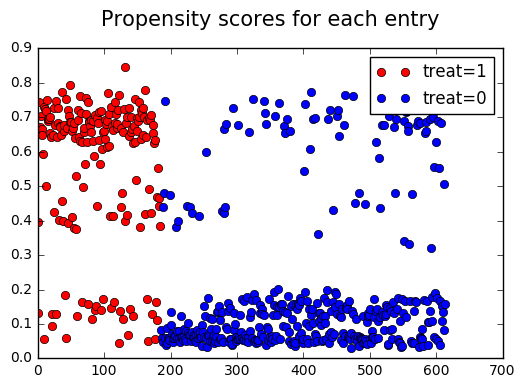

In [79]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()

db_X = db[['age','educ','black','hispan','married','nodegree','re78']]
db_y = db['treat']

logistic = logistic.fit(db_X, db_y)

prop_score = logistic.predict_proba(db_X)[:,1]

# Plot the propensity scores
X = [i for i in range(len(prop_score))]
# The first 185 entries are treat=1, the rest is treat=0
plt.plot(X[:185],prop_score[:185],'ro',label='treat=1')
plt.plot(X[186:],prop_score[186:],'bo',label='treat=0')
plt.legend()
plt.title('Propensity scores for each entry',fontsize=15,y=1.05)
plt.show()

## Question 2

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

#DON'T DO IT TO OFTEN, IT TAKES SEVERAL MINUTES !
newsgroups_train = fetch_20newsgroups(data_home='.',subset='train',download_if_missing=True)

In [ ]:
newsgroups_train.keys()

In [ ]:
newsgroups_train['filenames']

In [ ]:
newsgroups_train['target_names']